In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
     

In [3]:
file_path = "car_evaluation (1).csv"
df = pd.read_csv(file_path)

In [4]:
df.shape



(1727, 7)

In [5]:
df.head()

,vhigh,vhigh.1,2,2.1,small,low,unacc
0,vhigh,vhigh,2,2,small,med,unacc
1,vhigh,vhigh,2,2,small,high,unacc
2,vhigh,vhigh,2,2,med,low,unacc
3,vhigh,vhigh,2,2,med,med,unacc
4,vhigh,vhigh,2,2,med,high,unacc


In [6]:
col_names = ['buying', 'maint', 'doors', 'persons', 'lug_boot', 'safety', 'class']

df.columns = col_names

col_names

['buying', 'maint', 'doors', 'persons', 'lug_boot', 'safety', 'class']

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1727 entries, 0 to 1726
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   buying    1727 non-null   object
 1   maint     1727 non-null   object
 2   doors     1727 non-null   object
 3   persons   1727 non-null   object
 4   lug_boot  1727 non-null   object
 5   safety    1727 non-null   object
 6   class     1727 non-null   object
dtypes: object(7)
memory usage: 94.6+ KB


In [8]:
for col in col_names:
    print(df[col].value_counts())

buying
high     432
med      432
low      432
vhigh    431
Name: count, dtype: int64
maint
high     432
med      432
low      432
vhigh    431
Name: count, dtype: int64
doors
3        432
4        432
5more    432
2        431
Name: count, dtype: int64
persons
4       576
more    576
2       575
Name: count, dtype: int64
lug_boot
med      576
big      576
small    575
Name: count, dtype: int64
safety
med     576
high    576
low     575
Name: count, dtype: int64
class
unacc    1209
acc       384
good       69
vgood      65
Name: count, dtype: int64


In [9]:
df['class'].value_counts()

class
unacc    1209
acc       384
good       69
vgood      65
Name: count, dtype: int64

In [10]:
#check missing values in variables
df.isnull().sum()

buying      0
maint       0
doors       0
persons     0
lug_boot    0
safety      0
class       0
dtype: int64

In [11]:
X= df.drop(['class'], axis=1)
y=df['class']

In [12]:
#split X and Y iton training and testing sets
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.33, random_state=42)

In [13]:
X_train.shape, X_test.shape

((1157, 6), (570, 6))

In [14]:
X_train.dtypes

buying      object
maint       object
doors       object
persons     object
lug_boot    object
safety      object
dtype: object

In [15]:
X_train.head()

,buying,maint,doors,persons,lug_boot,safety
83,vhigh,vhigh,5more,2,med,low
48,vhigh,vhigh,3,more,med,med
468,high,vhigh,3,4,small,med
155,vhigh,high,3,more,med,low
1043,med,high,4,more,small,low


In [20]:
ordinal_cols = ['Education_Level', 'Satisfaction_Rating']  # Example column names


In [21]:
# Re-create DataFrame using original column names
X_columns = ['buying', 'maint', 'doors', 'persons', 'lug_boot', 'safety']  # add other column names if any
X_train = pd.DataFrame(X_train, columns=X_columns)
X_test = pd.DataFrame(X_test, columns=X_columns)

# Now encode
from sklearn.preprocessing import OrdinalEncoder

encoder = OrdinalEncoder()
X_train[ordinal_cols] = encoder.fit_transform(X_train[ordinal_cols])
X_test[ordinal_cols] = encoder.transform(X_test[ordinal_cols])


KeyError: "None of [Index(['Education_Level', 'Satisfaction_Rating'], dtype='object')] are in the [columns]"

In [22]:
X_train.head()

,buying,maint,doors,persons,lug_boot,safety
83,vhigh,vhigh,5more,2,med,low
48,vhigh,vhigh,3,more,med,med
468,high,vhigh,3,4,small,med
155,vhigh,high,3,more,med,low
1043,med,high,4,more,small,low


In [18]:
X_test.head()

,buying,maint,doors,persons,lug_boot,safety
599,high,high,4,2,big,low
932,med,vhigh,4,4,big,low
628,high,high,5more,2,big,high
1497,low,high,5more,4,med,med
1262,med,low,4,more,med,low


In [19]:
from sklearn.tree import DecisionTreeClassifier
clf_gini = DecisionTreeClassifier(criterion='gini', max_depth=3, random_state=0)


# fit the model
clf_gini.fit(X_train, y_train)

ValueError: could not convert string to float: 'vhigh'

In [ ]:
y_pred_gini = clf_gini.predict(X_test)

In [55]:
from sklearn.metrics import accuracy_score

print('Model accuracy score with criterion gini index: {0:0.4f}'. format(accuracy_score(y_test, y_pred_gini)))

Model accuracy score with criterion gini index: 0.7965


In [56]:
y_pred_train_gini = clf_gini.predict(X_train)

y_pred_train_gini

array(['unacc', 'acc', 'acc', ..., 'unacc', 'unacc', 'acc'], dtype=object)

In [57]:
print('Training-set accuracy score: {0:0.4f}'. format(accuracy_score(y_train, y_pred_train_gini)))

Training-set accuracy score: 0.7718


In [58]:
# print the scores on training and test set

print('Training set score: {:.4f}'.format(clf_gini.score(X_train, y_train)))

print('Test set score: {:.4f}'.format(clf_gini.score(X_test, y_test)))

Training set score: 0.7718
Test set score: 0.7965


In [59]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred_gini)

print("Confusion Matrix:")
print(cm)

Confusion Matrix:
[[113   0  14   0]
 [ 18   0   0   0]
 [ 58   0 341   0]
 [ 26   0   0   0]]


In [60]:
from sklearn.metrics import classification_report

print(classification_report(y_test, y_pred_gini))

              precision    recall  f1-score   support

         acc       0.53      0.89      0.66       127
        good       0.00      0.00      0.00        18
       unacc       0.96      0.85      0.90       399
       vgood       0.00      0.00      0.00        26

    accuracy                           0.80       570
   macro avg       0.37      0.44      0.39       570
weighted avg       0.79      0.80      0.78       570



C:\Users\SANCHIT\anaconda3\Anaconda\Lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\SANCHIT\anaconda3\Anaconda\Lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\SANCHIT\anaconda3\Anaconda\Lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


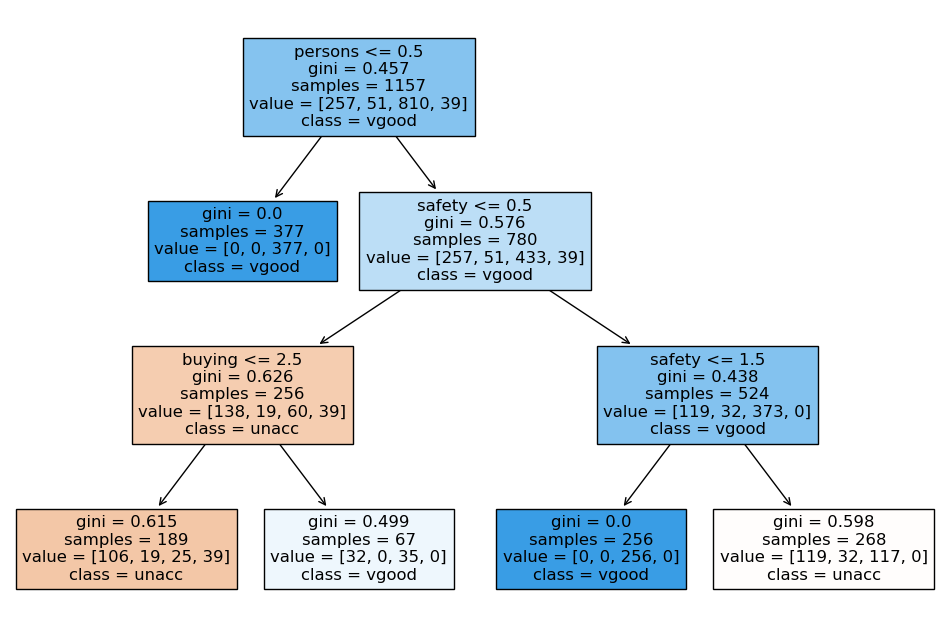

In [61]:
from sklearn import tree
plt.figure(figsize=(12,8))
tree.plot_tree(clf_gini, feature_names=X.columns, class_names=y.unique(), filled=True)
plt.show()